##**WEB PHISHING DETECTION**

##**IBM-Project-42720-1660707899**

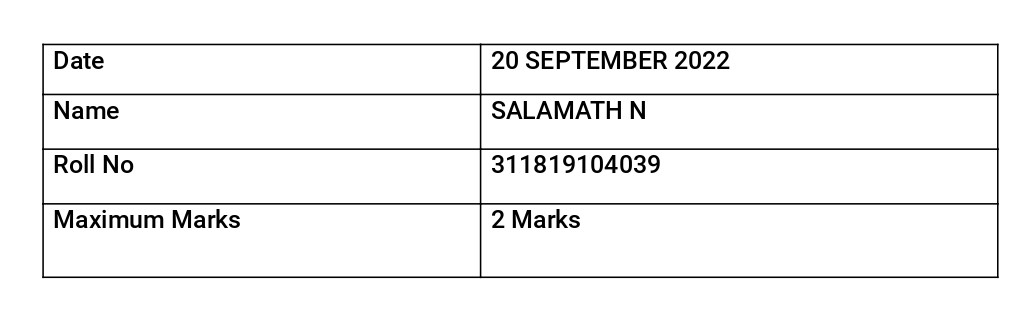

## Importing necessary modules after downloading the dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Uploading the Given Dataset

In [2]:
d=pd.read_csv("Mall_Customers.csv")
d=d.rename(columns = {'Annual Income (k$)' : 'Annual_Income','Spending Score (1-100)' : 'Spending_Score'})
d.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
d.shape

(200, 5)

In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


##  Performing Various Visualisations

**Univariate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


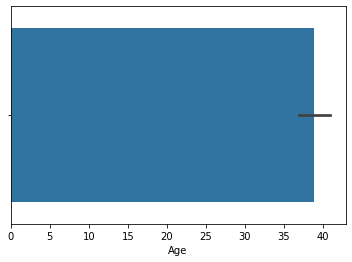

In [5]:
sns.barplot(d.Age)

**Bivariate Analysis**

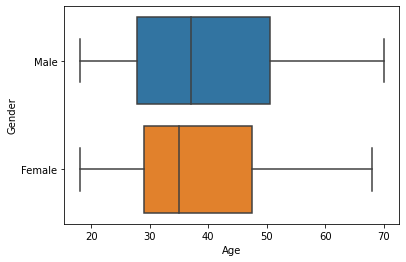

In [6]:
sns.boxplot(y=d.Gender,x=d.Age)

**Multivariate Analysis**

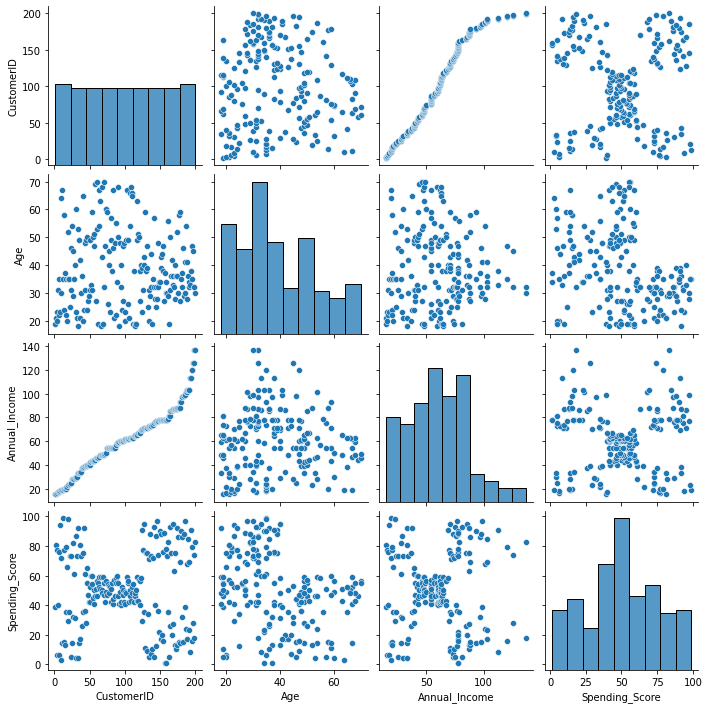

In [7]:
sns.pairplot(d)

## Performing descriptive statistics on the dataset.

In [8]:
d.describe(include='all')

,CustomerID,Gender,Age,Annual_Income,Spending_Score
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


##  Checking for Missing values

In [9]:
d.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

##  Finding the outliers and replacing them outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


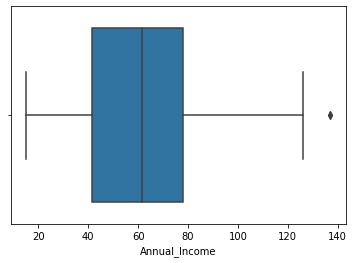

In [10]:
sns.boxplot(d['Annual_Income'])

In [11]:
q1 = d.Annual_Income.quantile(0.25)
q2 = d.Annual_Income.quantile(0.75)
IQR = q2 - q1
print(IQR)

36.5


In [12]:
d=d[~((d.Annual_Income<(q1-1.5*IQR))|(d.Annual_Income>(q2+1.5*IQR)))]
d

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


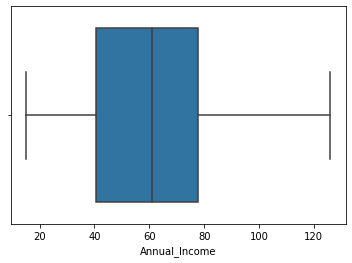

In [13]:
sns.boxplot(d['Annual_Income'])

## Checking for Categorical columns and perform Encoding

In [14]:
d.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
#here the Gender column needs to be converted into a numerical column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
d.Gender = le.fit_transform(d.Gender)

d.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## Scaling the data

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(d)
data_scaled[0:5]

array([[0.        , 1.        , 0.01923077, 0.        , 0.3877551 ],
       [0.00507614, 1.        , 0.05769231, 0.        , 0.81632653],
       [0.01015228, 0.        , 0.03846154, 0.00900901, 0.05102041],
       [0.01522843, 0.        , 0.09615385, 0.00900901, 0.7755102 ],
       [0.02030457, 0.        , 0.25      , 0.01801802, 0.39795918]])

## Performing any of the clustering algorithms

In [17]:
from sklearn.cluster import KMeans
km = KMeans()
res = km.fit_predict(data_scaled)
res

array([5, 5, 1, 1, 1, 1, 3, 1, 4, 1, 4, 1, 3, 1, 5, 5, 1, 5, 4, 1, 5, 5,
       3, 5, 3, 5, 3, 5, 3, 1, 4, 1, 4, 5, 3, 1, 3, 1, 3, 1, 3, 5, 4, 1,
       3, 1, 3, 1, 1, 1, 3, 5, 1, 4, 3, 4, 3, 4, 1, 4, 4, 5, 3, 3, 4, 5,
       3, 3, 5, 1, 4, 3, 3, 3, 4, 5, 3, 4, 1, 3, 4, 5, 4, 3, 1, 4, 3, 1,
       1, 3, 3, 5, 4, 3, 1, 5, 3, 1, 4, 5, 1, 3, 4, 5, 4, 1, 3, 4, 4, 4,
       4, 1, 7, 5, 1, 1, 3, 3, 3, 3, 2, 7, 6, 2, 7, 6, 0, 2, 0, 2, 0, 2,
       7, 6, 0, 6, 7, 2, 0, 6, 7, 2, 7, 6, 0, 2, 0, 6, 7, 2, 0, 2, 7, 6,
       7, 6, 0, 6, 0, 6, 7, 6, 0, 6, 0, 6, 0, 6, 7, 2, 0, 2, 0, 2, 7, 6,
       0, 2, 0, 2, 7, 6, 0, 6, 7, 2, 7, 2, 7, 6, 7, 6, 0, 6, 7, 6, 7, 2],
      dtype=int32)

In [18]:
data1 = pd.DataFrame(data_scaled, columns = d.columns)
data1.drop('CustomerID',axis=1,inplace=True)
data1.head()

,Gender,Age,Annual_Income,Spending_Score
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.009009,0.051020
3,0.0,0.096154,0.009009,0.775510
4,0.0,0.250000,0.018018,0.397959


In [19]:
data1['kclus']  = pd.Series(res)
data1.head()

,Gender,Age,Annual_Income,Spending_Score,kclus
0,1.0,0.019231,0.000000,0.387755,5
1,1.0,0.057692,0.000000,0.816327,5
2,0.0,0.038462,0.009009,0.051020,1
3,0.0,0.096154,0.009009,0.775510,1
4,0.0,0.250000,0.018018,0.397959,1


In [20]:
data1['kclus'].unique()

array([5, 1, 3, 4, 7, 2, 6, 0], dtype=int32)

In [21]:
data1['kclus'].value_counts()

3    36
1    34
4    26
5    23
6    22
7    20
0    19
2    18
Name: kclus, dtype: int64

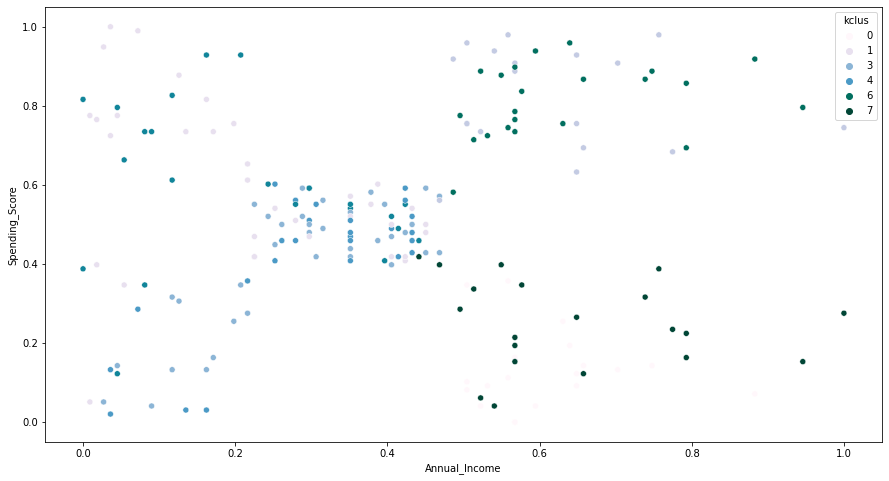

In [22]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x=data1['Annual_Income'],
                y=data1['Spending_Score'],
                hue=data1['kclus'],
                palette='PuBuGn')
plt.show()

In [23]:
ind = data1.iloc[:,0:4]
ind.head()

,Gender,Age,Annual_Income,Spending_Score
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.009009,0.051020
3,0.0,0.096154,0.009009,0.775510
4,0.0,0.250000,0.018018,0.397959


In [24]:
dep = data1.iloc[:,4:]
dep.head()

,kclus
0,5
1,5
2,1
3,1
4,1


## Splitting dataset into train and test data

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ind,dep,test_size=0.3,random_state=1)
x_train.head()

,Gender,Age,Annual_Income,Spending_Score
124,0.0,0.096154,0.495495,0.285714
97,0.0,0.173077,0.405405,0.500000
42,1.0,0.576923,0.216216,0.357143
17,1.0,0.038462,0.054054,0.663265
5,0.0,0.076923,0.018018,0.765306


In [26]:
x_test.head()

,Gender,Age,Annual_Income,Spending_Score
175,0.0,0.230769,0.657658,0.867347
40,0.0,0.903846,0.207207,0.346939
34,0.0,0.596154,0.162162,0.132653
90,0.0,0.961538,0.396396,0.551020
145,1.0,0.192308,0.558559,0.979592


In [27]:
y_train.head()

,kclus
124,7
97,1
42,4
17,5
5,1


In [28]:
y_test.head()

,kclus
175,6
40,3
34,3
90,3
145,2


In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
pred_test = lr.predict(x_test)
pred_test[0:5]

array([[4.6245647 ],
       [3.98746071],
       [3.19666711],
       [4.68138641],
       [3.6927675 ]])

## Measuring the performance using metrics

In [31]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
mse = mean_squared_error(pred_test,y_test)
print("The Mean squared error is: ", mse)
rmse = np.sqrt(mse)
print("The Root mean squared error is: ", rmse)
mae = mean_absolute_error(pred_test,y_test)
print("The Mean absolute error is: ", mae)
acc = lr.score(x_test,y_test)
print("The accuracy is: ", acc)

The Mean squared error is:  4.464226085606602
The Root mean squared error is:  2.112871526053253
The Mean absolute error is:  1.9164569130273326
The accuracy is:  0.030686736538976356
